In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


Now load each Data csv Players and ranking is pretty straight forward

## All ATP Players 

In [3]:
players = pd.read_csv('../data/raw/atp_players.csv')
print(f"loaded successfully {len(players)} players ")
print(f"\nColumns: {list(players.columns)}")
print(f"\nFirst few rows:")
players.head()


loaded successfully 65989 players 

Columns: ['player_id', 'name_first', 'name_last', 'hand', 'dob', 'ioc', 'height', 'wikidata_id']

First few rows:


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


## Loading the Rankings + Analyzing the data 


Currently doing for Rankings current 2024:

No null values, looks like the rankings are redone every week or so based on new matches done so basically when we are merging with the matches we need to get the rankings and ranking points to patch with the match dates of that week so we can accurately match the data 

✓ Loaded 92,341 ranking records

Columns: ['ranking_date', 'rank', 'player', 'points']

Date range: 20240101 to 20241230
   ranking_date  rank  player  points
0      20240101     1  104925   11245
1      20240101     2  207989    8855
2      20240101     3  106421    7600
3      20240101     4  206173    6490
4      20240101     5  126094    4805
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92341 entries, 0 to 92340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ranking_date  92341 non-null  int64
 1   rank          92341 non-null  int64
 2   player        92341 non-null  int64
 3   points        92341 non-null  int64
dtypes: int64(4)
memory usage: 2.8 MB
None


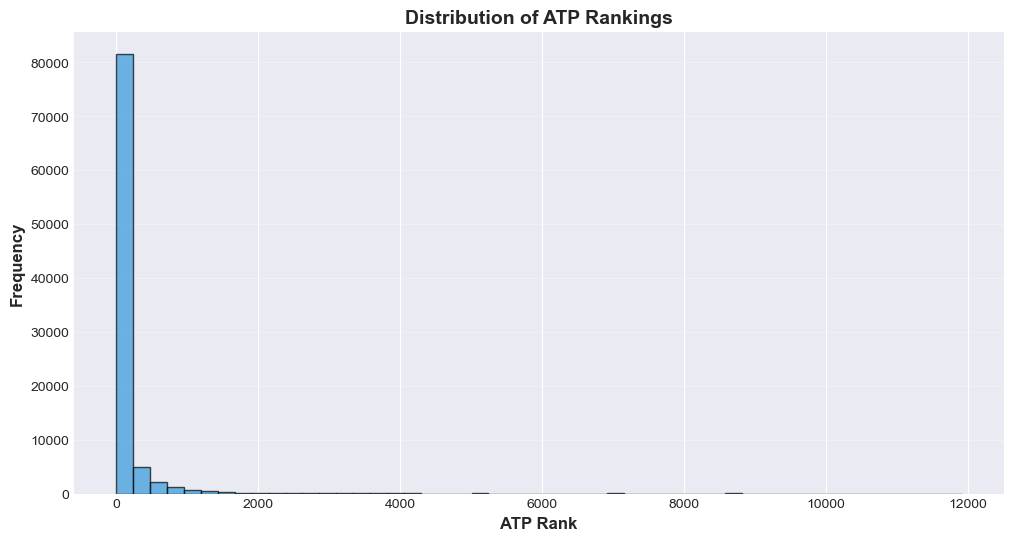

In [15]:
# Cell 4: Load Rankings
rankings = pd.read_csv('../data/raw/atp_rankings_current.csv')
print(f"✓ Loaded {len(rankings):,} ranking records")
print(f"\nColumns: {list(rankings.columns)}")
print(f"\nDate range: {rankings['ranking_date'].min()} to {rankings['ranking_date'].max()}")

print(rankings.head())
print(rankings.info())
#print(rankings.isnull().sum() ) # no Null values 

# Plotting Rankings

# Show distribution of all rankings
plt.figure(figsize=(12, 6))
plt.hist(rankings['points'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
plt.xlabel('ATP Rank', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of ATP Rankings', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Load The Tour Matches 

Currently thinking that we should only do the 2020-2024 matches ( Official + Qualification Only)

In [ ]:
# Cell 5: Load Main Tour Matches (2018-2024 as recommended)
import os

years = range(2020, 2025)  # 2020-2024
match_files = [f'../data/raw/atp_matches_{year}.csv' for year in years]

# Load and concatenate
dfs = []
for file in match_files:
    if os.path.exists(file):
        df = pd.read_csv(file, low_memory=False)
        print(f"✓ Loaded {file.split('/')[-1]}: {len(df):,} matches")
        dfs.append(df)

matches = pd.concat(dfs, ignore_index=True)
print(f"\n{'='*70}")
print(f"TOTAL MAIN TOUR MATCHES (2020-2024): {len(matches):,}")
print(f"{'='*70}")

matches.head()

✓ Loaded atp_matches_2023.csv: 2,986 matches
✓ Loaded atp_matches_2024.csv: 3,076 matches

TOTAL MAIN TOUR MATCHES (2023-2024): 6,062


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,Taylor Fritz,R,196.0,USA,25.1,126610,5.0,NaN,Matteo Berrettini,R,196.0,ITA,26.7,7-6(4) 7-6(6),3,F,135.0,15.0,2.0,85.0,52.0,45.0,16.0,12.0,0.0,0.0,7.0,2.0,97.0,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,Frances Tiafoe,R,188.0,USA,24.9,207518,NaN,NaN,Lorenzo Musetti,R,185.0,ITA,20.8,6-2 0-0 RET,3,F,34.0,3.0,1.0,27.0,19.0,15.0,3.0,4.0,3.0,3.0,0.0,0.0,21.0,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,Taylor Fritz,R,196.0,USA,25.1,128034,2.0,NaN,Hubert Hurkacz,R,196.0,POL,25.8,7-6(5) 7-6(5),3,SF,104.0,11.0,0.0,80.0,50.0,44.0,19.0,12.0,4.0,4.0,17.0,1.0,82.0,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,Frances Tiafoe,R,188.0,USA,24.9,200390,NaN,NaN,Kacper Zuk,R,183.0,POL,23.9,6-3 6-3,3,SF,79.0,5.0,4.0,61.0,37.0,31.0,11.0,9.0,5.0,5.0,3.0,3.0,68.0,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,Stefanos Tsitsipas,R,193.0,GRE,24.3,126610,5.0,NaN,Matteo Berrettini,R,196.0,ITA,26.7,4-6 7-6(2) 6-4,3,SF,155.0,9.0,1.0,98.0,52.0,43.0,28.0,16.0,1.0,2.0,7.0,2.0,89.0,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
